In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import keras
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling1D
from keras.layers import Dense, Dropout
from keras import utils
# from keras.utils import np_utils

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
path = r'C:\Users\Michael\Desktop\Career Foundry\03 Machine Learning\02 Real-World Applications of Machine Learning\Data Sets'

In [ ]:
X_full = pd.read_csv(os.path.join(path, 'DATASET weather_prediction_imputed.csv'), index_col = False, header=0)
X_full.head()

In [ ]:
import warnings
warnings.simplefilter('ignore')

# sns.pairplot(X_full[['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']], hue = 'species')
# plt.show()

In [ ]:
#Create an 'X' matrix by dropping the unneeded columns.
y = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False, header=0)

In [ ]:
X_full.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)
y.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)

In [ ]:
X

In [ ]:
y

In [ ]:
y_name = y.columns

In [ ]:
y_name

In [ ]:
y_array = y.values

In [ ]:
y_array

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
StandardScaler()

In [ ]:
X = scaler.fit_transform(X)
X

In [ ]:
X.shape

In [ ]:
X = X.reshape(-1,15,9)

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_array, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
y_name

In [ ]:
types = {0:'BASEL_pleasant_weather', 1:'BELGRADE_pleasant_weather',
       2:'BUDAPEST_pleasant_weather', 3:'DEBILT_pleasant_weather',
       4:'DUSSELDORF_pleasant_weather', 5:'HEATHROW_pleasant_weather',
       6:'KASSEL_pleasant_weather', 7:'LJUBLJANA_pleasant_weather',
       8:'MAASTRICHT_pleasant_weather', 9:'MADRID_pleasant_weather',
       10:'MUNCHENB_pleasant_weather', 11:'OSLO_pleasant_weather',
       12:'SONNBLICK_pleasant_weather', 13:'STOCKHOLM_pleasant_weather',
       14:'VALENTIA_pleasant_weather'}

In [ ]:
def convert(inputx):
  for t_list in inputx:
    for i,h in enumerate(t_list):
      if h==0:
        yield f"{types[i]}".replace("_ple", "_unple")
      else:
        yield f"{types[i]}"

In [ ]:
'''def confusion_matrix(y_true, y_pred):
    # y_true = pd.Series([types[y] for y in y_true])
    # y_pred = pd.Series([types[y] for y in np.argmax(y_pred, axis=-1)])
    # an axis of "-1" will return the last array in y_pred, i.e. the pleasant name in our case

    y_true = pd.Series(convert(y_true))
    y_pred = pd.Series(convert(y_pred))
    
    return pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Pred'])'''

# CNN RELU

In [ ]:
model = Sequential()
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(15,9))) #64
model.add(Dense(32, activation='relu')) #16
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(15, activation='relu')) #3
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
model = Sequential()
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(15,9))) #64
model.add(Dense(16, activation='relu')) #16
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(3, activation='softmax')) #3
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(X_train,y_train, batch_size=32, epochs=30,verbose=1)
acc = model.evaluate(X_train,y_train) #validation_data=(TeX2, TeY2) <---used for a 3-split test
print('Loss:', acc[0], 'Accuracy', acc[1])

In [ ]:
model.fit(X_train,y_train,batch_size=32, epochs=10,verbose=1)
acc = model.evaluate(X_train,y_train) #validation_data=(TeX2, TeY2) <---used for a 3-split test
print('Loss:', acc[0], 'Accuracy', acc[1])

# RNN

In [ ]:
pred = model.predict(X_test)
#pred_y = pred.argmax(axis=-1)

# Evaluate
print(confusion_matrix(y_test, pred))#model.predict(TeX2)))

In [ ]:
# locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations = ["BASEL", "BELGRADE", "BUDAPEST", "DEBILT", 
             "DUSSELDORF", "HEATHROW", "KASSEL", "LJUBLJANA", 
             "MAASTRICHT", "MADRID", "MUNCHENB", "OSLO", 
             "SONNBLICK", "STOCKHOLM", "VALENTIA"]

In [267]:
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(64, input_shape=(15, 9), activation='relu'))
model.add(Dense(15, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras.metrics.TruePositives(name='tp'),
        keras.metrics.FalsePositives(name='fp'),
        keras.metrics.TrueNegatives(name='tn'),
        keras.metrics.FalseNegatives(name='fn'),
        keras.metrics.BinaryAccuracy(name='accuracy'),
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc')])

In [276]:
model.fit(X_train, y_train, epochs=43)

Epoch 1/43
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9927 - auc: 0.9993 - fn: 308.1151 - fp: 552.3889 - loss: 0.0216 - precision: 0.9788 - recall: 0.9876 - tn: 94454.8984 - tp: 25881.8008
Epoch 2/43
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9900 - auc: 0.9988 - fn: 414.2520 - fp: 593.8472 - loss: 0.0282 - precision: 0.9749 - recall: 0.9794 - tn: 94263.0234 - tp: 25926.0801
Epoch 3/43
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9935 - auc: 0.9994 - fn: 290.0298 - fp: 500.9186 - loss: 0.0195 - precision: 0.9803 - recall: 0.9894 - tn: 94725.1953 - tp: 25681.0605
Epoch 4/43
503/503 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9935 - auc: 0.9994 - fn: 289.7103 - fp: 496.5555 - loss: 0.0191 - precision: 0.9810 - recall: 0.9891 - tn: 94533.1797 - tp: 25877.7559
Epoch 5/43
503/503 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9936 - auc: 0.9994 - fn: 262.4980 - fp: 505.0218 - loss: 0.0189 - precision: 0.9806 - recall: 0.9903 - tn: 94488.0938 - tp: 25941.

In [277]:
scores = model.predict(X_test)

216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [278]:
lst = []
for n in range(len(scores)):
    lst.append([int(round(elem, 0)) for elem in list(scores[n])])

In [279]:
lst = np.array(lst)
y_prediction = pd.DataFrame({'BASEL': lst[:, 0], 'BELGRADE': lst[:, 1],
                             'BUDAPEST': lst[:, 2],'DEBILT': lst[:, 3],
                             'DUSSELDORF': lst[:, 4],'HEATHROW': lst[:, 5],
                             'KASSEL': lst[:, 6],'LJUBLJANA': lst[:, 7],
                             'MAASTRICHT': lst[:, 8],'MADRID': lst[:, 9],
                             'MUNCHENB': lst[:, 10],'OSLO': lst[:, 11],
                             'SONNBLICK': lst[:, 12],'STOCKHOLM': lst[:, 13],
                             'VALENTIA': lst[:, 14]})

y_test = np.array(y_test)
y_testframe = pd.DataFrame({'BASEL': y_test[:, 0], 'BELGRADE': y_test[:, 1],
                            'BUDAPEST': y_test[:, 2],'DEBILT': y_test[:, 3],
                            'DUSSELDORF': y_test[:, 4],'HEATHROW': y_test[:, 5],
                            'KASSEL': y_test[:, 6],'LJUBLJANA': y_test[:, 7],
                            'MAASTRICHT': y_test[:, 8],'MADRID': y_test[:, 9],
                            'MUNCHENB': y_test[:, 10],'OSLO': y_test[:, 11],
                            'SONNBLICK': y_test[:, 12],'STOCKHOLM': y_test[:, 13],
                            'VALENTIA': y_test[:, 14]})

In [280]:
y_testframe.head()

,BASEL,BELGRADE,BUDAPEST,DEBILT,DUSSELDORF,HEATHROW,KASSEL,LJUBLJANA,MAASTRICHT,MADRID,MUNCHENB,OSLO,SONNBLICK,STOCKHOLM,VALENTIA
0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0
3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [281]:
y_prediction.head()

,BASEL,BELGRADE,BUDAPEST,DEBILT,DUSSELDORF,HEATHROW,KASSEL,LJUBLJANA,MAASTRICHT,MADRID,MUNCHENB,OSLO,SONNBLICK,STOCKHOLM,VALENTIA
0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0
3,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [282]:
y_prediction.nunique()

BASEL         2
BELGRADE      2
BUDAPEST      2
DEBILT        2
DUSSELDORF    2
HEATHROW      2
KASSEL        2
LJUBLJANA     2
MAASTRICHT    2
MADRID        2
MUNCHENB      2
OSLO          2
SONNBLICK     1
STOCKHOLM     2
VALENTIA      2
dtype: int64

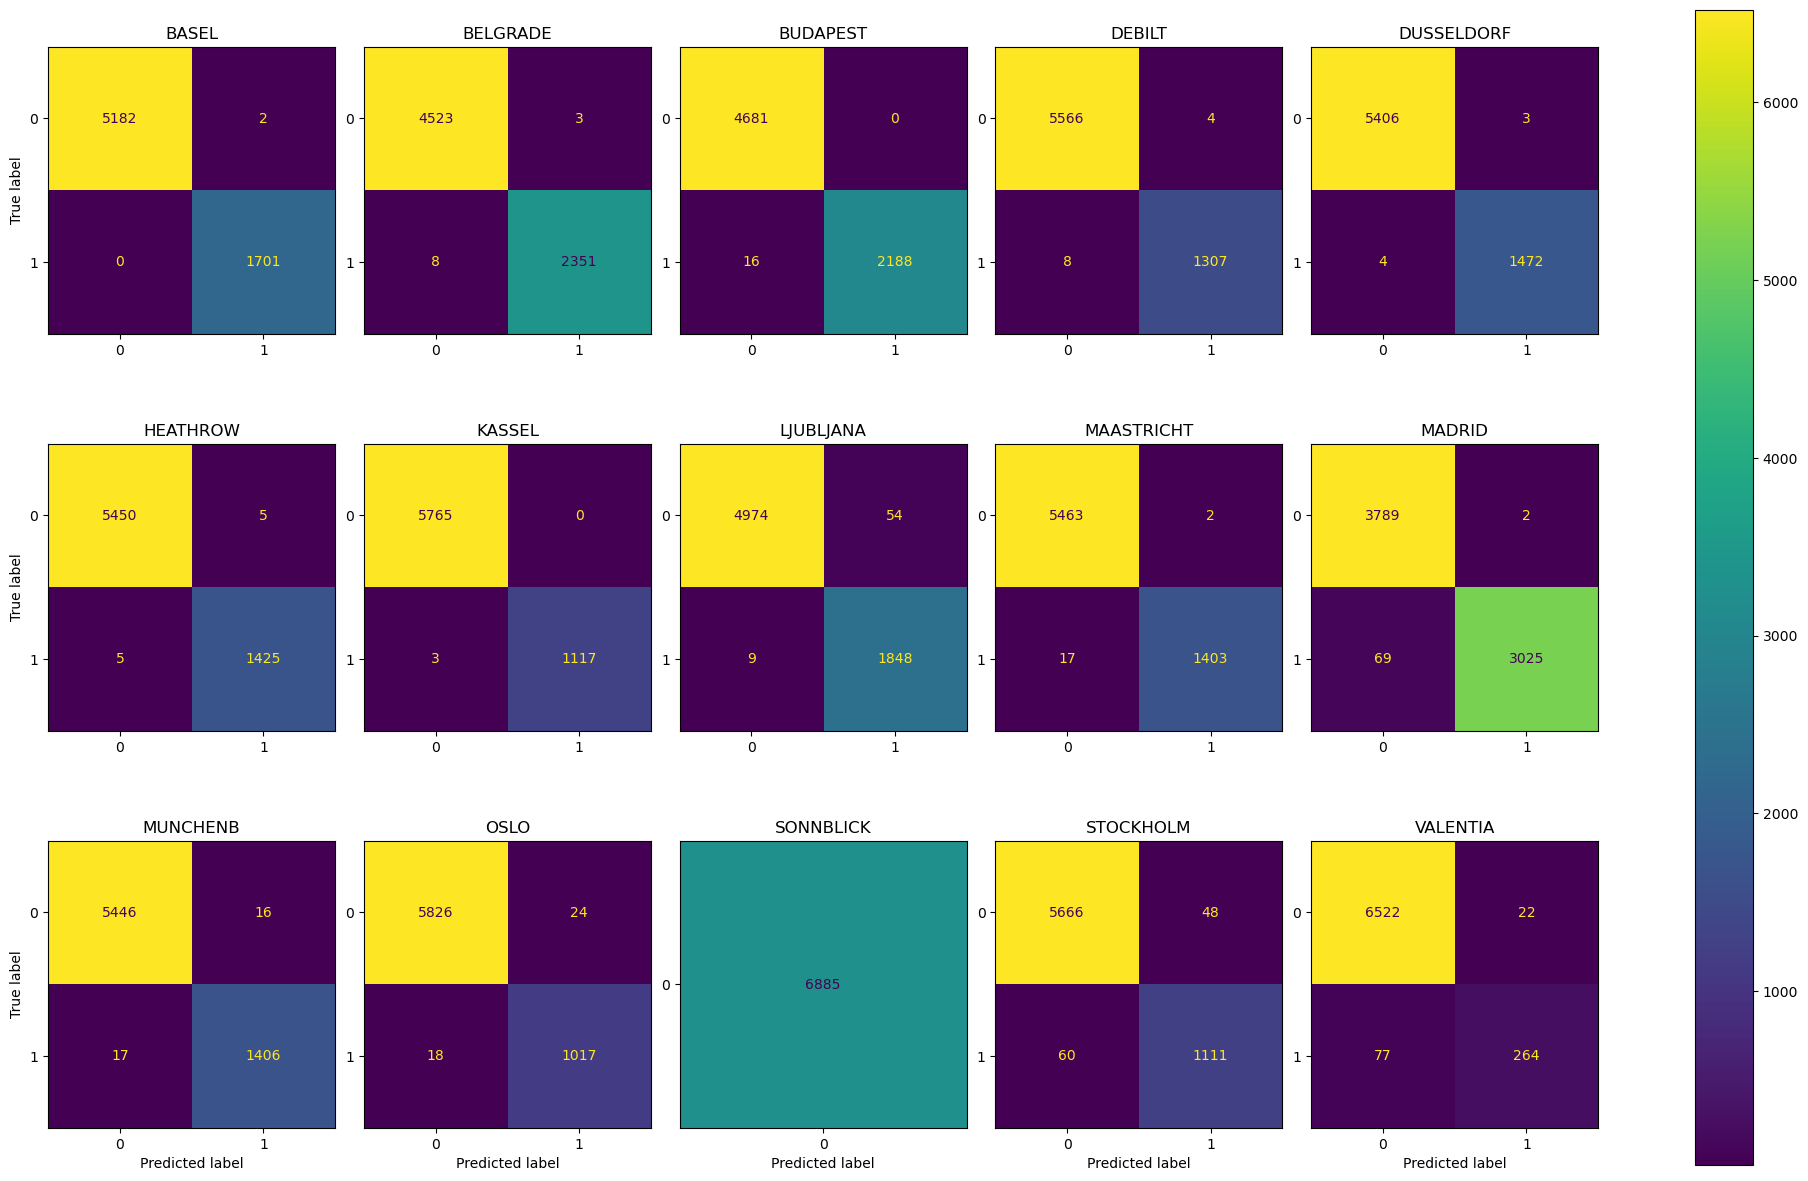

In [283]:
f, axes = plt.subplots(3, 5, figsize=(25, 15))
axes = axes.ravel()
for i in range(15):
    if i==12:
        labels = [0]
    else:
        labels = [0,1]
    
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test[:, i],
                                                   lst[:, i]),
                                  display_labels=labels)
    disp.plot(ax=axes[i], values_format='.4g')
    
    disp.ax_.set_title(locations[i])
    
    if i<10:
        disp.ax_.set_xlabel('')
    if i%5!=0:
        disp.ax_.set_ylabel('')
    disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()